In [1]:
from SOView import *
import shutil
import os
import gc
from scipy import sparse
import pandas as pd

/home/yzy/anaconda3/envs/SODB/lib/python3.9/site-packages/tqdm-4.64.1-py3.9.egg/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.9.1 anndata==0.8.0 umap==0.5.2 numpy==1.23.3 scipy==1.9.1 pandas==1.5.0 scikit-learn==1.0.2 statsmodels==0.13.2 python-igraph==0.9.9 pynndescent==0.5.6
squidpy==1.1.2


In [2]:
path = '/home/yzy/PUBDT/st/spacetx/raw/MERFISH'

# first data

In [7]:
raw_pd = pd.read_csv(f'{path}/mouse_VISp.csv')

In [8]:
raw_pd

,Unnamed: 0.1,Unnamed: 0,1700022I11Rik,1810046K07Rik,5031425F14Rik,5730522E02Rik,Acta2,Adam2,Adamts2,Adamts4,...,Vwc2,Wipf3,Wnt7b,Zfp804b,area,position,total_reads,simpleClass,x_um,y_um
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,170.10,[1161.11337076 6178.3830543 ],870,67,1161.113371,6178.383054
1,1,1,0,0,1,1,0,0,0,0,...,9,1,0,1,206.55,[1162.91337076 6113.1330543 ],454,233,1162.913371,6113.133054
2,2,2,0,0,0,1,0,0,0,0,...,1,2,0,0,184.68,[1168.31337076 6046.0830543 ],269,97,1168.313371,6046.083054
3,3,3,0,0,0,0,2,0,0,0,...,3,0,0,0,87.48,[1163.81337076 6202.6830543 ],340,105,1163.813371,6202.683054
4,4,4,0,0,0,1,0,0,0,2,...,4,3,0,1,155.52,[1166.96337076 6083.8830543 ],241,72,1166.963371,6083.883054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394,2394,2394,0,0,0,0,3,1,0,0,...,3,2,0,0,277.02,[3144.26337076 5201.4330543 ],1062,96,3144.263371,5201.433054
2395,2395,2395,0,0,0,0,6,1,0,1,...,1,3,1,1,200.07,[3154.61337076 5331.0330543 ],188,0,3154.613371,5331.033054
2396,2396,2396,0,1,0,1,3,2,0,3,...,8,5,0,0,338.58,[3165.41337076 5190.1830543 ],1322,99,3165.413371,5190.183054
2397,2397,2397,1,0,0,0,0,0,0,2,...,2,0,0,0,189.54,[3189.71337076 5292.7830543 ],120,96,3189.713371,5292.783054


In [9]:
raw_pd = raw_pd.iloc[:,2:]

In [11]:
raw_pd

,1700022I11Rik,1810046K07Rik,5031425F14Rik,5730522E02Rik,Acta2,Adam2,Adamts2,Adamts4,Adra1b,Alk,...,Vwc2,Wipf3,Wnt7b,Zfp804b,area,position,total_reads,simpleClass,x_um,y_um
0,0,0,0,0,0,0,0,0,1,1,...,1,0,0,0,170.10,[1161.11337076 6178.3830543 ],870,67,1161.113371,6178.383054
1,0,0,1,1,0,0,0,0,0,0,...,9,1,0,1,206.55,[1162.91337076 6113.1330543 ],454,233,1162.913371,6113.133054
2,0,0,0,1,0,0,0,0,0,0,...,1,2,0,0,184.68,[1168.31337076 6046.0830543 ],269,97,1168.313371,6046.083054
3,0,0,0,0,2,0,0,0,0,0,...,3,0,0,0,87.48,[1163.81337076 6202.6830543 ],340,105,1163.813371,6202.683054
4,0,0,0,1,0,0,0,2,0,0,...,4,3,0,1,155.52,[1166.96337076 6083.8830543 ],241,72,1166.963371,6083.883054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394,0,0,0,0,3,1,0,0,0,0,...,3,2,0,0,277.02,[3144.26337076 5201.4330543 ],1062,96,3144.263371,5201.433054
2395,0,0,0,0,6,1,0,1,0,0,...,1,3,1,1,200.07,[3154.61337076 5331.0330543 ],188,0,3154.613371,5331.033054
2396,0,1,0,1,3,2,0,3,0,0,...,8,5,0,0,338.58,[3165.41337076 5190.1830543 ],1322,99,3165.413371,5190.183054
2397,1,0,0,0,0,0,0,2,0,2,...,2,0,0,0,189.54,[3189.71337076 5292.7830543 ],120,96,3189.713371,5292.783054


In [13]:
var_names = raw_pd.columns[:-6]

In [15]:
obs_names = np.array(raw_pd.index).astype('str')

In [16]:
X = raw_pd.values[:,:-6]

In [20]:
adata = ad.AnnData(X=X)
adata.obs_names = obs_names
adata.var_names = var_names
adata.obsm['spatial'] = raw_pd[['x_um','y_um']].values
adata.obs['area'] = raw_pd[['area']].values
adata.obs['simpleClass'] = raw_pd[['simpleClass']].values
adata.obs['simpleClass'] = adata.obs['simpleClass'].astype('category')

/tmp/ipykernel_1152181/2130317938.py:1: FutureWarning: X.dtype being converted to np.float32 from object. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(X=X)


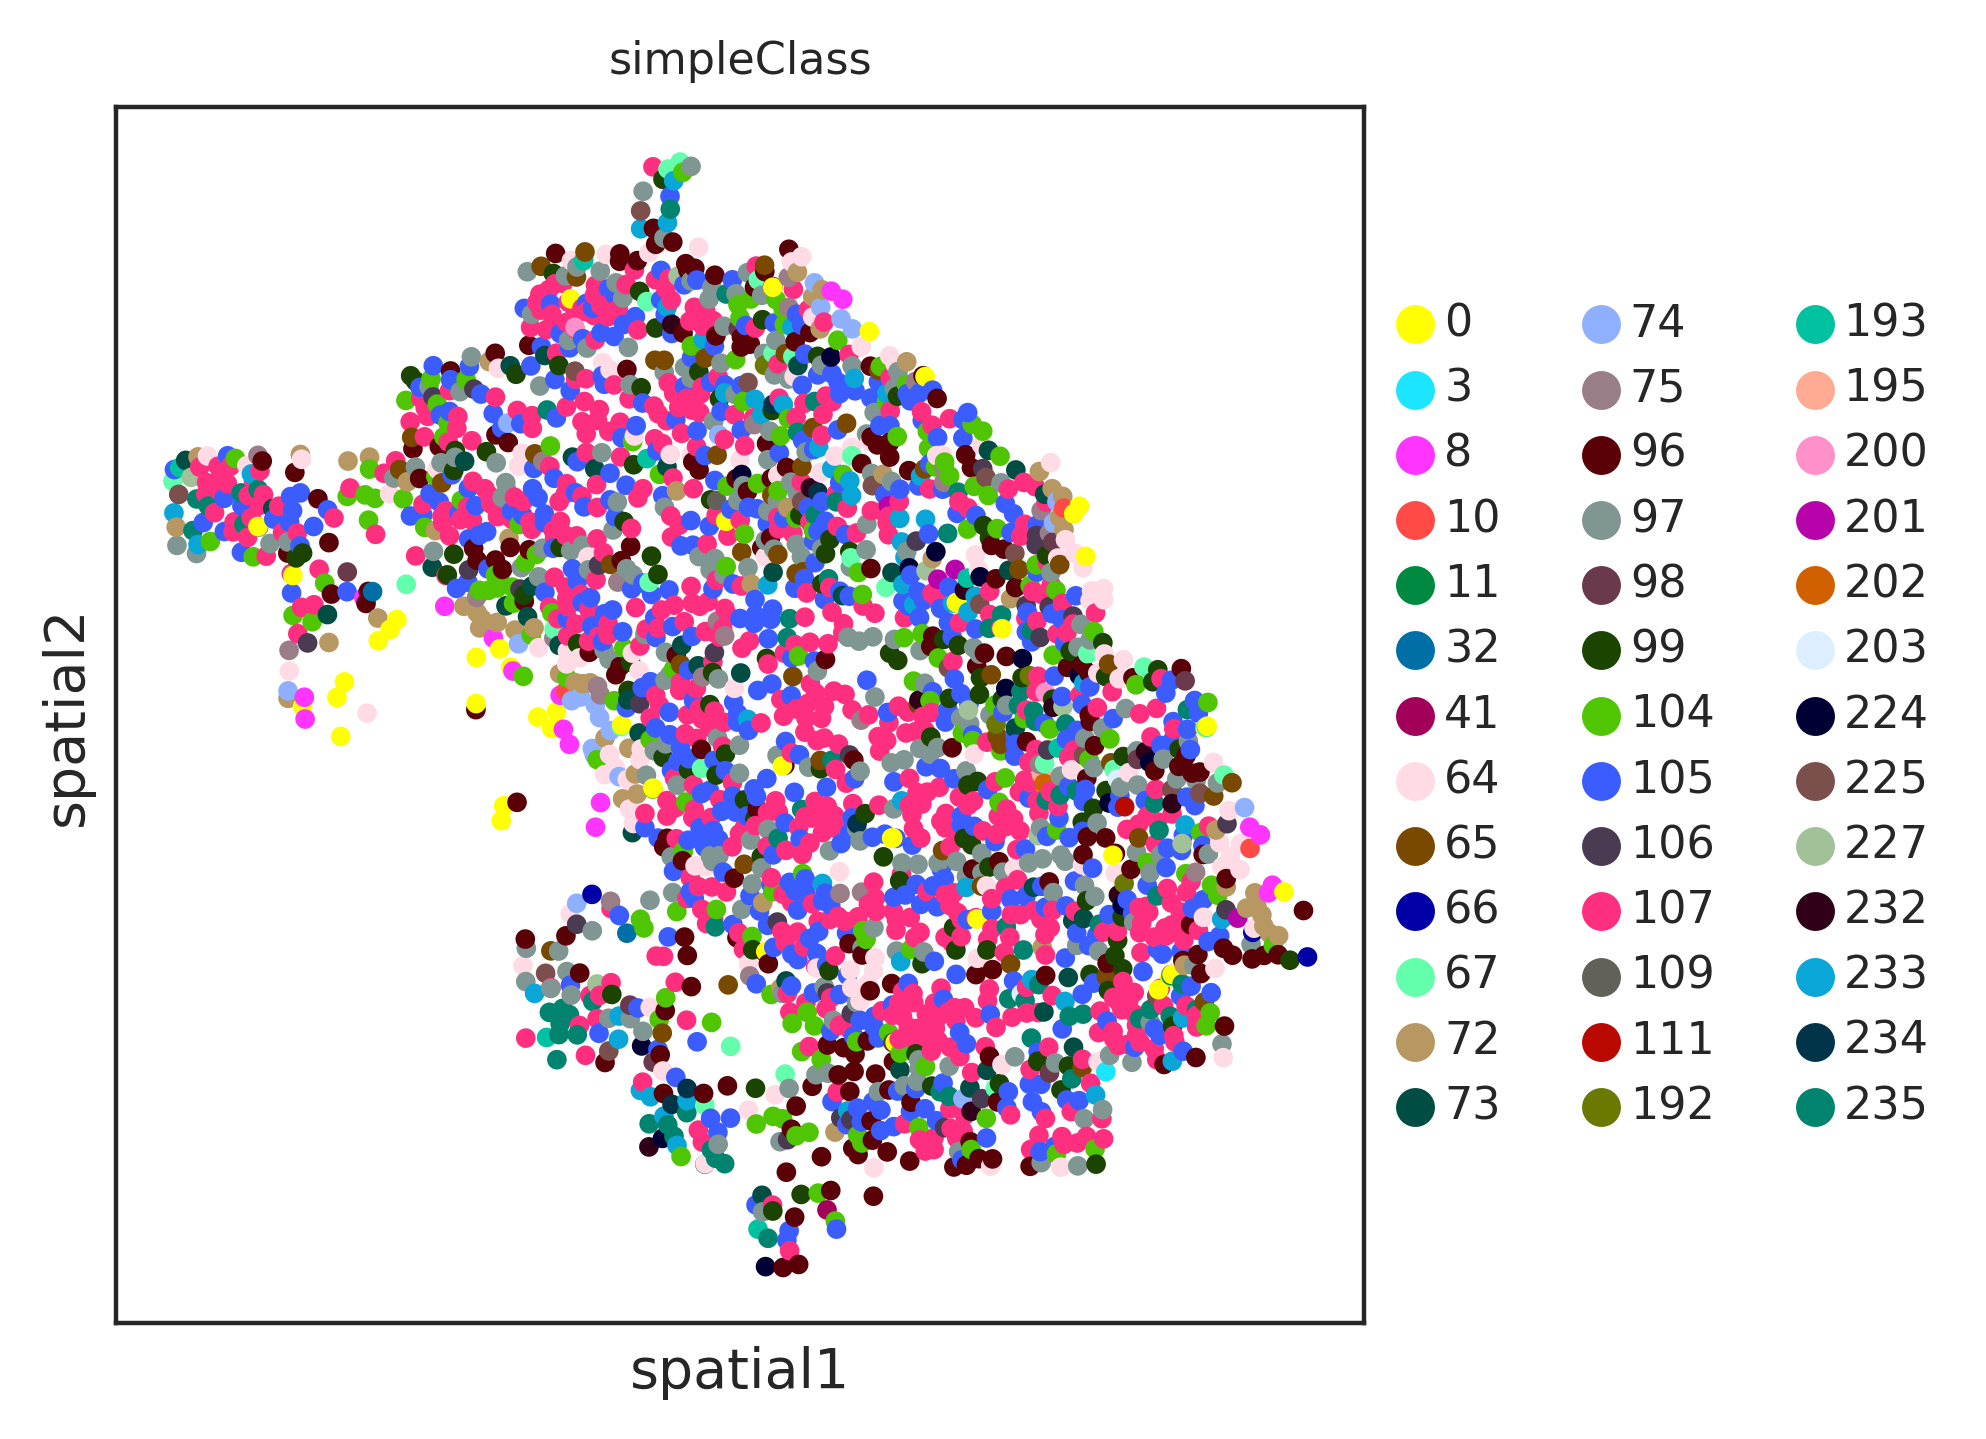

In [21]:
sc.pl.embedding(adata,basis='spatial',color='simpleClass')

In [23]:
adata.write_h5ad(f'{path}/mouse_VISp.h5ad')